<a href="https://colab.research.google.com/github/rsaxby/tv_script_generation/blob/master/TV_script_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN - TV Script Generation

This was the third project in the Udacity Deep Learning Nanodegree program. In this project, I generated [Seinfeld](https://en.wikipedia.org/wiki/Seinfeld) TV scripts using RNNs.  The dataset is from [Seinfeld dataset](https://www.kaggle.com/thec03u5/seinfeld-chronicles#scripts.csv) of scripts from 9 seasons.  


In [1]:
# import libraries
import torch
import torchvision
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from collections import Counter
from torchvision import models, transforms
from torch import nn, optim

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Colab\ Notebooks/data/generate_script_data/

# list files in directory
# !ls

import helper
from generate import generate
from train import train_rnn, forward_back_prop
from LSTM import LSTM

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/data/generate_script_data


## Explore the Data

In [0]:
# load in data
data_dir = 'Seinfeld_Scripts.txt'
text = helper.load_data(data_dir)

In [0]:
view_line_range = (0, 10)

print('Dataset Stats\n')
print('Roughly the number of unique words: {}'.format(len({word: None for word in text.split()})))

lines = text.split('\n')
print('Number of lines: {}'.format(len(lines)))
word_count_line = [len(line.split()) for line in lines]
print('Average number of words in each line: {}\n'.format(np.average(word_count_line)))

print("-"*100)
print('The lines {} to {}:\n'.format(*view_line_range))
print('\n'.join(text.split('\n')[view_line_range[0]:view_line_range[1]]))

Dataset Stats

Roughly the number of unique words: 46367
Number of lines: 109233
Average number of words in each line: 5.544240293684143

----------------------------------------------------------------------------------------------------
The lines 0 to 10:

jerry: do you know what this is all about? do you know, why were here? to be out, this is out...and out is one of the single most enjoyable experiences of life. people...did you ever hear people talking about we should go out? this is what theyre talking about...this whole thing, were all out now, no one is home. not one person here is home, were all out! there are people trying to find us, they dont know where we are. (on an imaginary phone) did you ring?, i cant find him. where did he go? he didnt tell me where he was going. he must have gone out. you wanna go out you get ready, you pick out the clothes, right? you take the shower, you get all ready, get the cash, get your friends, the car, the spot, the reservation...then youre 

---
## Preprocess data
We need to preprocess the data by tokenizing punctuation, and encoding the words to integers. We will also need a reverse lookup table to convert the integers back to the vocabulary.

### Tokenize Punctuation
We'll be splitting the script into a word array using spaces as delimiters.  However, punctuations like periods and exclamation marks can create multiple ids for the same word. For example, "bye" and "bye!" would generate two different word ids.

This dictionary will be used to tokenize the symbols and add the delimiter (space) around it.  This separates each symbols as its own word, making it easier for the neural network to predict the next word.

The following punctuation symbols are the keys and values are the token:
- Period ( **.** )
- Comma ( **,** )
- Quotation Mark ( **"** )
- Semicolon ( **;** )
- Exclamation mark ( **!** )
- Question mark ( **?** )
- Left Parentheses ( **(** )
- Right Parentheses ( **)** )
- Dash ( **-** )
- Return ( **\n** )



## Pre-process all the data and save it

In [0]:
#preprocess data and save it

helper.preprocess_and_save_data(data_dir, helper.token_lookup, helper.create_lookup_tables)

# Check Point
Load our tokenized words and dictionaries

In [0]:
int_text, vocab_to_int, int_to_vocab, token_dict = helper.load_preprocess()

## Train the Neural Network

### Hyperparameters

Set and train the neural network with the following parameters:
- Set `sequence_length` to the length of a sequence.
- Set `batch_size` to the batch size.
- Set `num_epochs` to the number of epochs to train for.
- Set `learning_rate` to the learning rate for an Adam optimizer.
- Set `vocab_size` to the number of unique tokens in our vocabulary.
- Set `output_size` to the desired size of the output.
- Set `embedding_dim` to the embedding dimension; smaller than the vocab_size.
- Set `hidden_dim` to the hidden dimension of your RNN.
- Set `n_layers` to the number of layers/cells in your RNN.
- Set `show_every_n_batches` to the number of batches at which the neural network should print progress.


In [4]:
# Data params
# Sequence Length
sequence_length = 10  # of words in a sequence
# Batch Size
batch_size = 128

# data loader - do not change
train_loader = helper.batch_data(int_text, sequence_length, batch_size)
print(len(train_loader))
print(len(int_text))
print(len(vocab_to_int))

6977
893068
21101


In [0]:
# Training parameters
# Number of Epochs
num_epochs = 10
# Learning Rate
learning_rate = 0.0001

# Model parameters
# Vocab size
vocab_size = len(vocab_to_int)
# Output size
output_size = len(vocab_to_int)
# Embedding Dimension
embedding_dim = 200
# Hidden Dimension
hidden_dim = 1024 
# Number of RNN Layers
n_layers = 2

# Show stats for every n number of batches
show_every_n_batches = 1000

## Train and Save the Model

LSTM(
  (embedding): Embedding(21101, 200)
  (lstm): LSTM(200, 1024, num_layers=2, batch_first=True, dropout=0.1)
  (dropout): Dropout(p=0.1)
  (fc1): Linear(in_features=1024, out_features=21101, bias=True)
)
Training for 10 epoch(s)...
Epoch:    1/10    Loss: 5.315966662883759

Epoch:    1/10    Loss: 4.748413198232651

Epoch:    1/10    Loss: 4.564974627256394

Epoch:    1/10    Loss: 4.443097419261933

Epoch:    1/10    Loss: 4.342179317474365

Epoch:    1/10    Loss: 4.283993170022964

Epoch:    2/10    Loss: 4.19634091359401

Epoch:    2/10    Loss: 4.088799948215485

Epoch:    2/10    Loss: 4.057359923124313

Epoch:    2/10    Loss: 4.047254534721374

Epoch:    2/10    Loss: 4.010341264486313

Epoch:    2/10    Loss: 3.9898109273910523

Epoch:    3/10    Loss: 3.904500654231199

Epoch:    3/10    Loss: 3.8530237324237824

Epoch:    3/10    Loss: 3.841009118080139

Epoch:    3/10    Loss: 3.831748018503189

Epoch:    3/10    Loss: 3.813307229757309

Epoch:    3/10    Loss: 3.81466

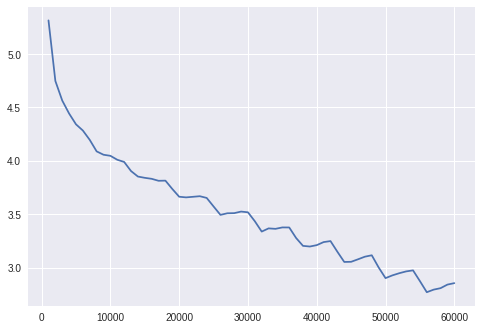

Model Trained and Saved


In [6]:
# create model and move to gpu if available
rnn = LSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers, dropout=0.1)
print(rnn)
if train_on_gpu:
    rnn.cuda()

# defining loss and optimization functions for training
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# training the model
trained_rnn = train_rnn(train_loader, rnn, batch_size, optimizer, criterion, num_epochs, show_every_n_batches)

# saving the trained model
helper.save_model('./save/trained_rnn', trained_rnn)
print('Model Trained and Saved')

---
# LoadCheckpoint

In [0]:
_, vocab_to_int, int_to_vocab, token_dict = helper.load_preprocess()
trained_rnn = helper.load_model('./save/trained_rnn')

## Generate TV Script
We can now generate TV scripts with our trained network.

In [7]:
# run the cell multiple times to get different results!
gen_length = 700 # modify the length to your preference
prime_word = 'jerry' # name for starting the script
sequence_length = 10  # of words in a sequence


pad_word = helper.SPECIAL_WORDS['PADDING']
generated_script = generate(trained_rnn, vocab_to_int[prime_word +":"], int_to_vocab, token_dict, vocab_to_int[pad_word],sequence_length, gen_length)
print(generated_script)


jerry: uh, i think i may be going out with her.

george: no, i just-

george: you know, it's not a good question. it's not my fault. i can't go with her. i dont think that i have to be in the army for a couple- weeks, and the one that was messing.

kramer:(to george) hey!(he turns to the door)

jerry:(to kramer) you know, i really think i'm gonna do something


#### Save the script to a text file


In [0]:
# save script to a text file
f =  open("generated_script_1.txt","w")
f.write(generated_script)
f.close()